In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [104]:
df = pd.read_csv('./music_genre.csv')

In [105]:
# Clean table of instance_id, artist_name, track_name, key, mode, and obtained_date
df = df.drop(['instance_id', 'artist_name', 'track_name', 'key', 'mode', 'obtained_date', 'popularity'], axis=1)
df = df.reset_index(drop=True)

# Clean table of songs with negative duration
negative_lengths = df[df['duration_ms'] < 0].index
df.drop(negative_lengths, inplace=True)
df = df.reset_index(drop=True)

# Clean table of songs with unknown tempo
unknown_tempo = df[df['tempo'] == '?'].index
df.drop(unknown_tempo, inplace=True)
df = df.reset_index(drop=True)

# Clean table of songs with NaN values
df = df.dropna()
df = df.reset_index(drop=True)

# Round tempos
def df_value_round(x):
    x = float(x)
    return round(x)

df['tempo'] = df['tempo'].apply(df_value_round)

# convert duration_ms to durastion_secs
def ms_to_s(x):
    x = float(x)
    return x / 1000

df['duration_ms'] = df['duration_ms'].apply(ms_to_s)
df = df.rename(columns={'duration_ms': 'duration_secs'})

results = df['music_genre']

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
normalize = MinMaxScaler()
normalize.fit(df.drop('music_genre', axis=1))
normalized = normalize.fit_transform(df.drop('music_genre', axis=1))
normalized_df = pd.DataFrame(normalized, columns=(df.drop('music_genre', axis=1).columns))
df = normalized_df

In [108]:
df['music_genre'] = results
df

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,0.012751,0.607081,0.045239,0.890804,0.953815,0.115446,0.787616,0.008372,0.435484,0.535282,Electronic
1,0.003072,0.604922,0.044641,0.755562,0.011847,0.529450,0.835381,0.013265,0.505376,0.335685,Electronic
2,0.025502,0.771157,0.033768,0.700463,0.002540,0.148769,0.837724,0.235620,0.505376,0.272177,Electronic
3,0.004669,0.624352,0.046149,0.587260,0.912651,0.148769,0.802914,0.020659,0.596774,0.325605,Electronic
4,0.029016,0.553109,0.044372,0.803648,0.000008,0.097271,0.841741,0.357399,0.623656,0.231855,Electronic
...,...,...,...,...,...,...,...,...,...,...,...
40555,0.133534,0.852116,0.049561,0.660391,0.000008,0.289126,0.784623,0.031858,0.354839,0.634073,Hip-Hop
40556,0.157631,0.700993,0.052728,0.361856,0.000000,0.100300,0.733058,0.035555,0.473118,0.113911,Hip-Hop
40557,0.005994,0.683722,0.038812,0.763576,0.000000,0.134632,0.819118,0.134500,0.521505,0.398185,Hip-Hop
40558,0.083434,0.779793,0.055162,0.472054,0.000000,0.097271,0.827525,0.023703,0.225806,0.356855,Hip-Hop


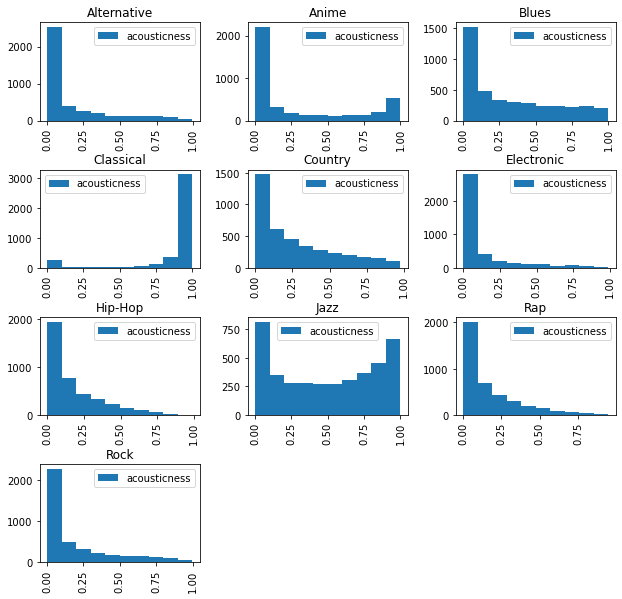

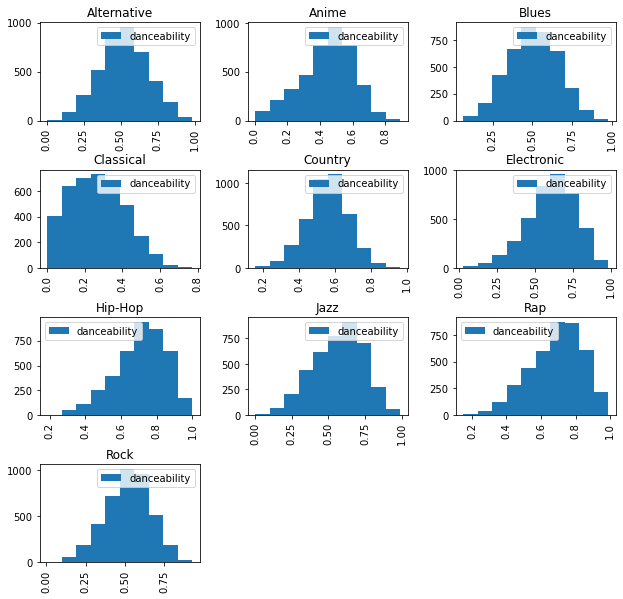

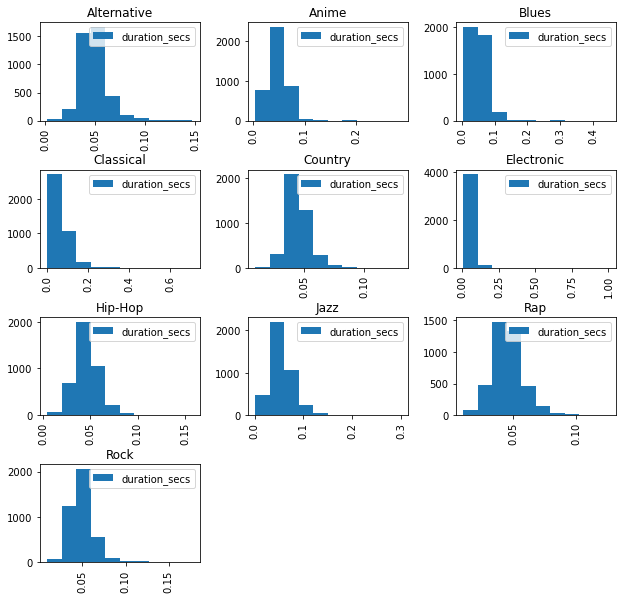

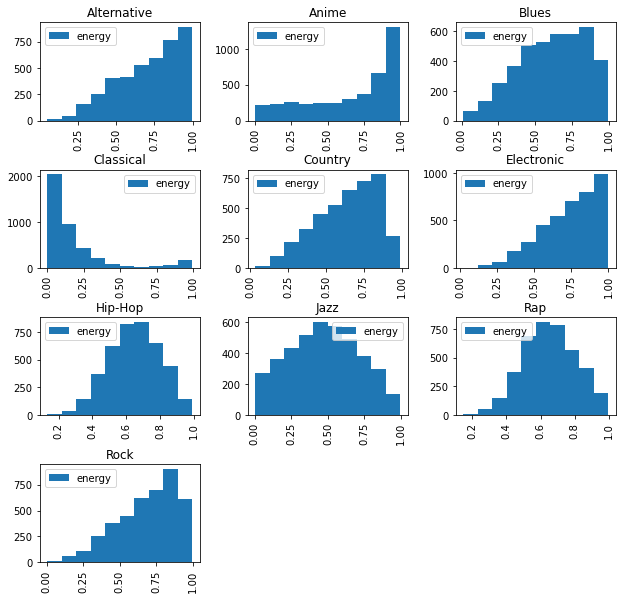

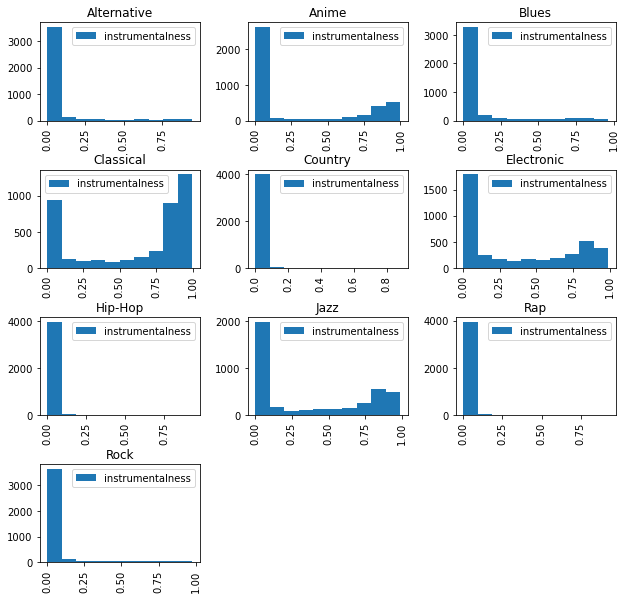

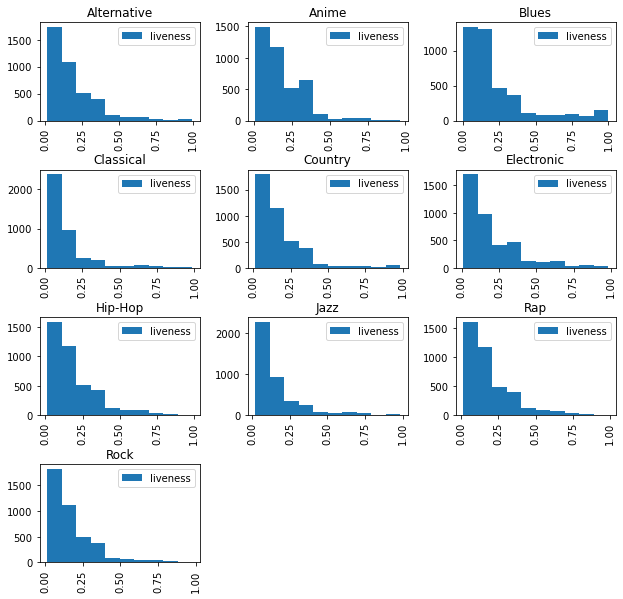

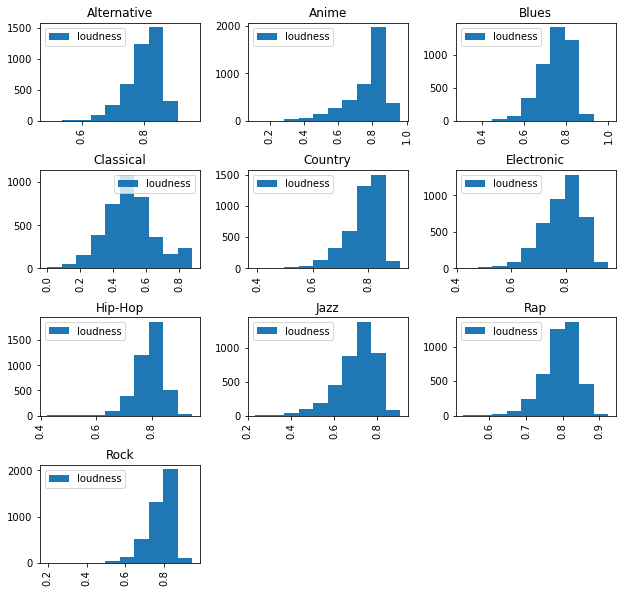

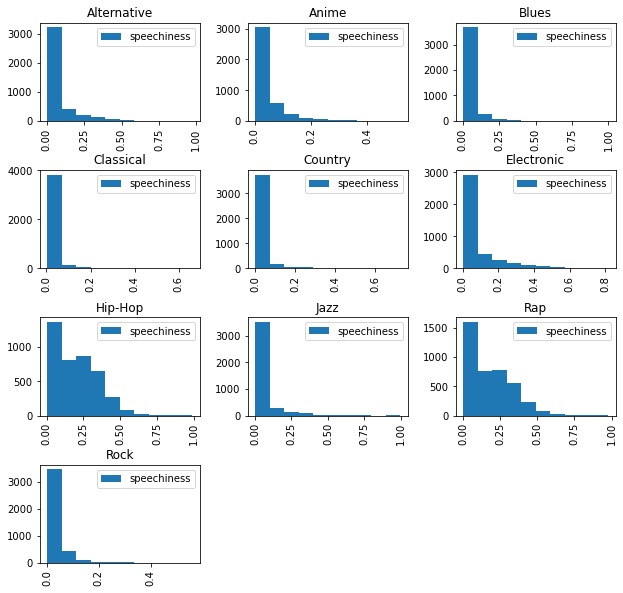

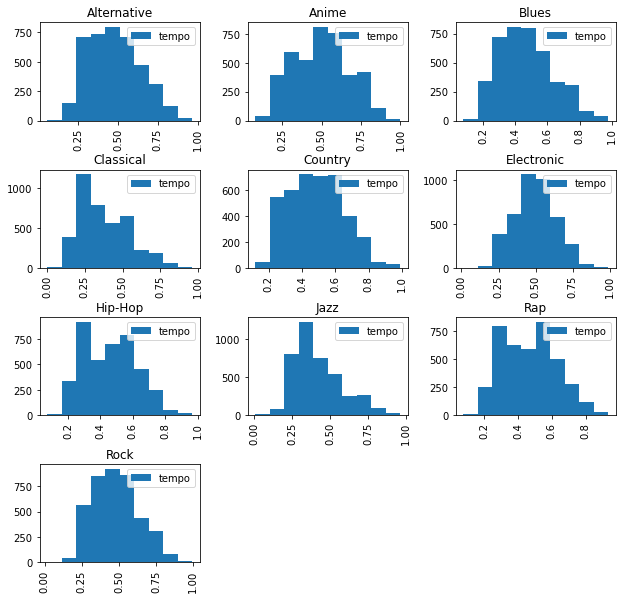

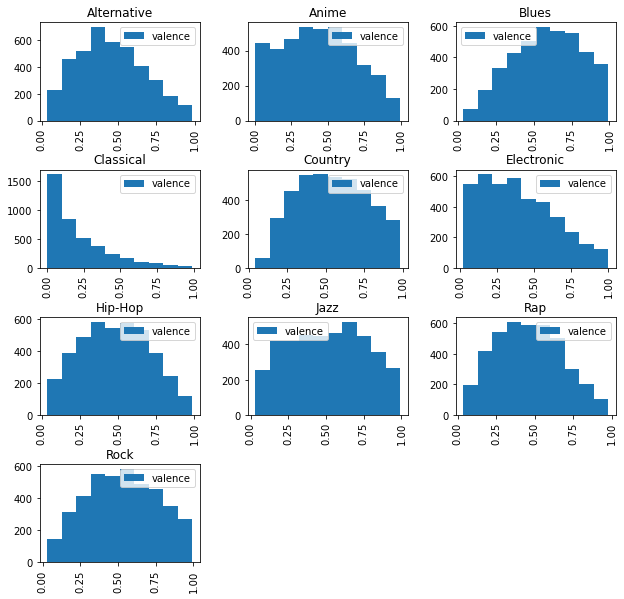

In [109]:
# histograms of each genre
training_features = df.drop(['music_genre'], axis=1)
for col in training_features:
    hist = df.hist(column=col, by=df['music_genre'], figsize=(10,10), legend=True)

In [110]:
# split data into test and train
train_df, test_df = train_test_split(df, test_size=.25, shuffle=True)

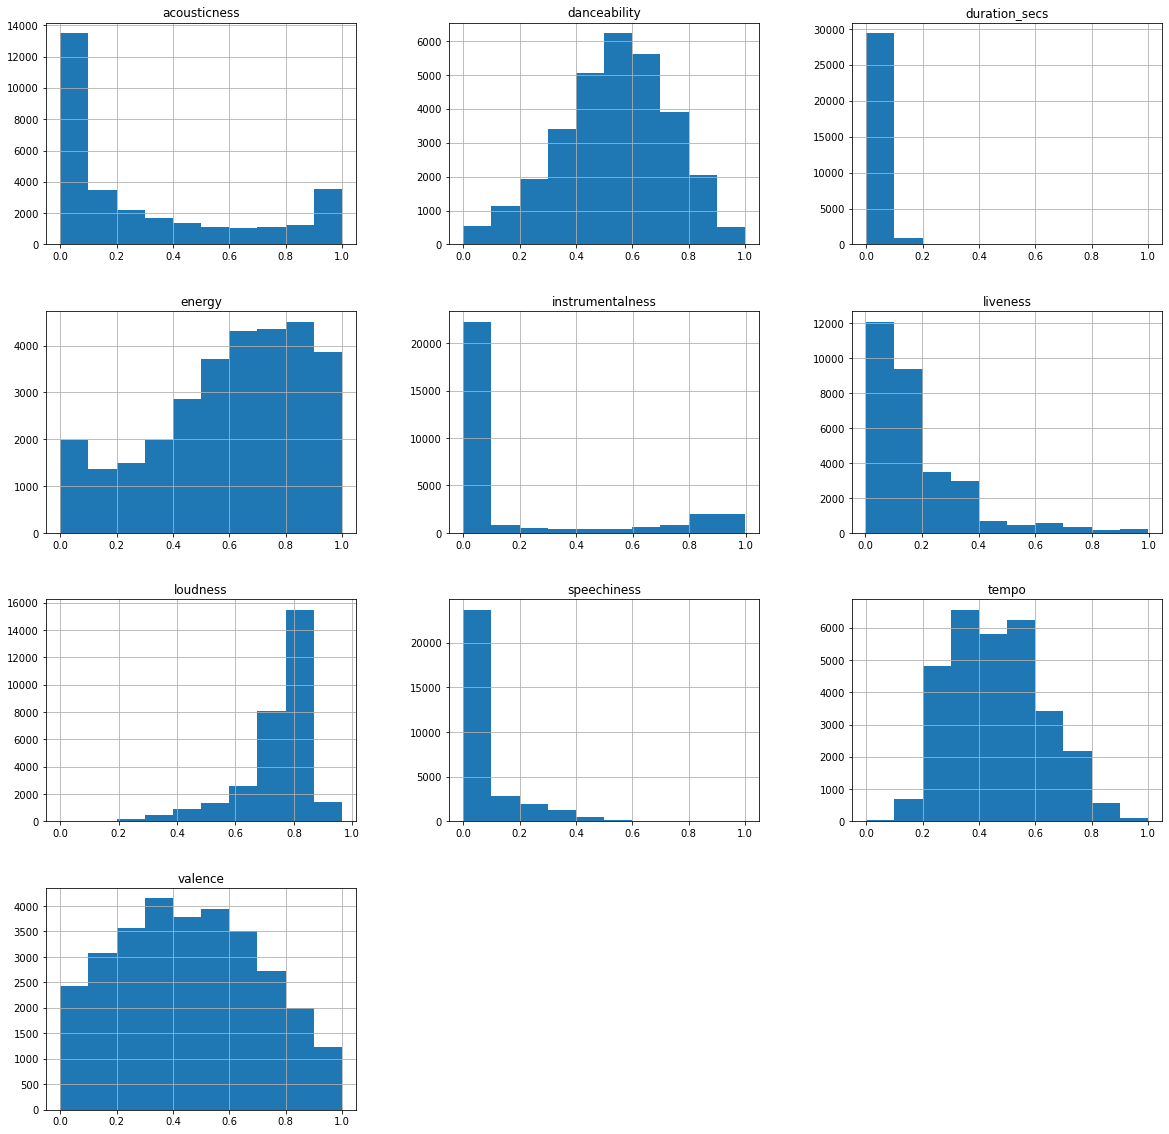

In [111]:
# histograms of training data
histograms = train_df.hist(figsize=(20, 20))

In [112]:
# Descriptive Stats - Mean
df.groupby(['music_genre']).mean()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.166484,0.522396,0.048610,0.711831,0.060886,0.188268,0.797788,0.072423,0.475304,0.452259
Anime,0.284790,0.444554,0.048158,0.667933,0.276803,0.185634,0.770541,0.046074,0.498361,0.439620
Blues,0.313480,0.504875,0.053079,0.612828,0.094173,0.226010,0.750083,0.043767,0.469334,0.582512
Classical,0.873907,0.266756,0.065812,0.175186,0.605978,0.154127,0.500423,0.031855,0.375915,0.212626
Country,0.272474,0.557897,0.044886,0.637230,0.005863,0.177463,0.782098,0.029117,0.483805,0.541590
Electronic,0.124549,0.605109,0.056735,0.738594,0.352994,0.202596,0.787041,0.083711,0.493408,0.394935
Hip-Hop,0.179152,0.709048,0.045569,0.647610,0.010506,0.193559,0.791974,0.200544,0.461824,0.480213
Jazz,0.496086,0.566517,0.055514,0.473719,0.355442,0.164511,0.706105,0.056173,0.417279,0.512019
Rap,0.171767,0.687864,0.045400,0.651079,0.008721,0.189335,0.794992,0.179145,0.464693,0.460024


In [113]:
# Descriptive Stats - Median
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.034036,0.519646,0.047005,0.748549,0.000067,0.123524,0.808289,0.032619,0.462366,0.435484
Anime,0.064357,0.462435,0.050069,0.784614,0.000407,0.128573,0.814353,0.024899,0.505376,0.439516
Blues,0.203815,0.506693,0.047928,0.631840,0.000933,0.128573,0.761223,0.022725,0.451613,0.590726
Classical,0.971888,0.261658,0.055141,0.098184,0.840863,0.101310,0.494654,0.022834,0.333333,0.141129
Country,0.183735,0.560665,0.043724,0.669408,0.000000,0.118476,0.796948,0.013156,0.478495,0.531250
Electronic,0.026305,0.616796,0.051190,0.773594,0.186747,0.119485,0.798927,0.038382,0.494624,0.363911
Hip-Hop,0.107430,0.724741,0.044513,0.651375,0.000000,0.127564,0.798720,0.183429,0.462366,0.479839
Jazz,0.511546,0.583333,0.051796,0.475059,0.121486,0.106358,0.722583,0.023432,0.381720,0.518145
Rap,0.095181,0.706390,0.044400,0.649372,0.000000,0.126554,0.800955,0.151354,0.462366,0.451613


In [114]:
# Descriptive Stats - Standard Deviation
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.034036,0.519646,0.047005,0.748549,0.000067,0.123524,0.808289,0.032619,0.462366,0.435484
Anime,0.064357,0.462435,0.050069,0.784614,0.000407,0.128573,0.814353,0.024899,0.505376,0.439516
Blues,0.203815,0.506693,0.047928,0.631840,0.000933,0.128573,0.761223,0.022725,0.451613,0.590726
Classical,0.971888,0.261658,0.055141,0.098184,0.840863,0.101310,0.494654,0.022834,0.333333,0.141129
Country,0.183735,0.560665,0.043724,0.669408,0.000000,0.118476,0.796948,0.013156,0.478495,0.531250
Electronic,0.026305,0.616796,0.051190,0.773594,0.186747,0.119485,0.798927,0.038382,0.494624,0.363911
Hip-Hop,0.107430,0.724741,0.044513,0.651375,0.000000,0.127564,0.798720,0.183429,0.462366,0.479839
Jazz,0.511546,0.583333,0.051796,0.475059,0.121486,0.106358,0.722583,0.023432,0.381720,0.518145
Rap,0.095181,0.706390,0.044400,0.649372,0.000000,0.126554,0.800955,0.151354,0.462366,0.451613


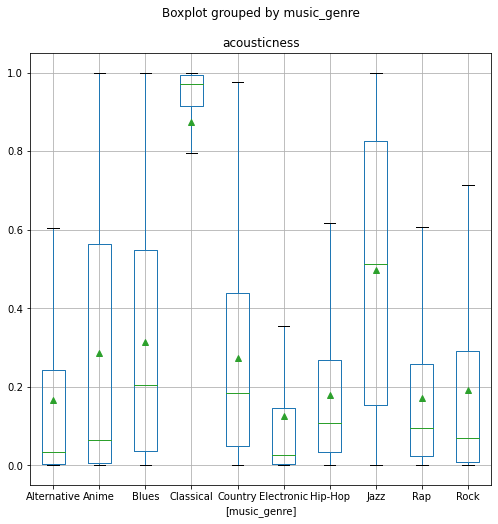

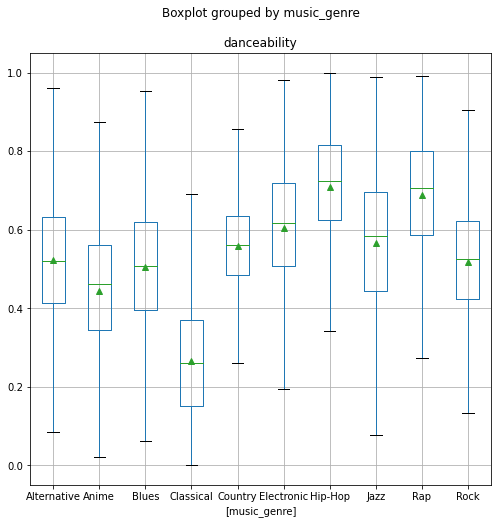

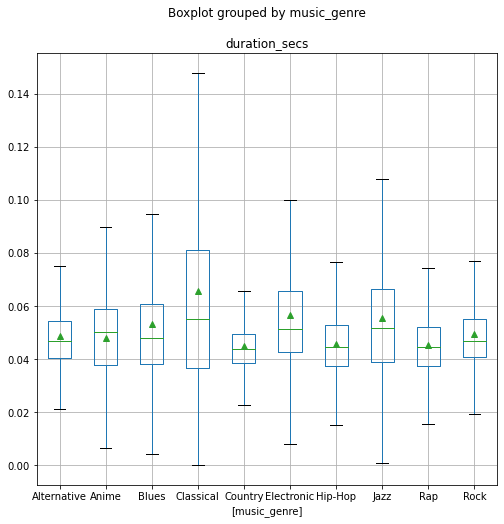

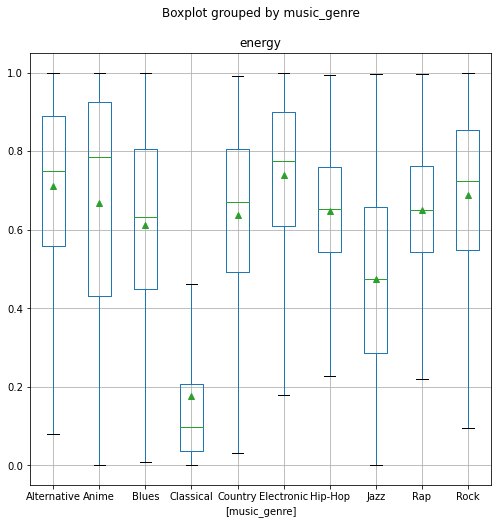

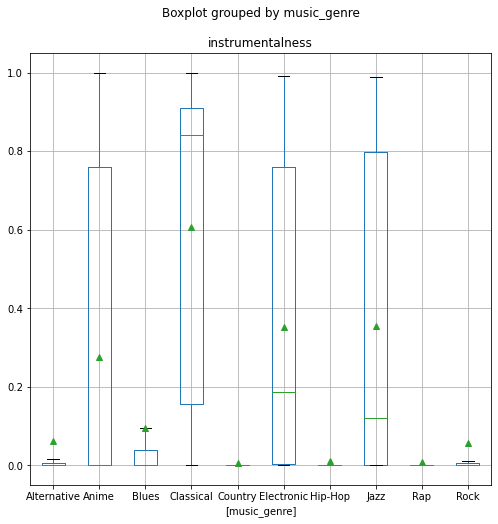

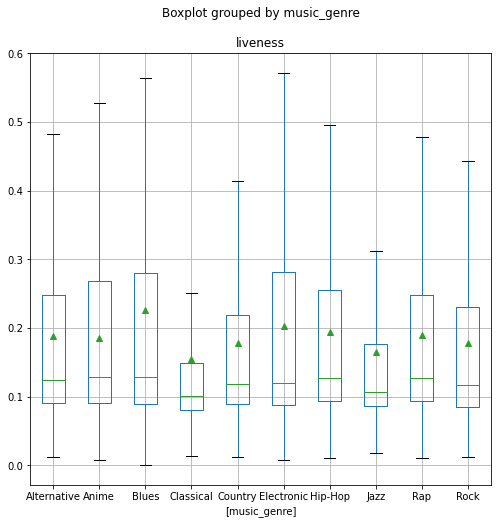

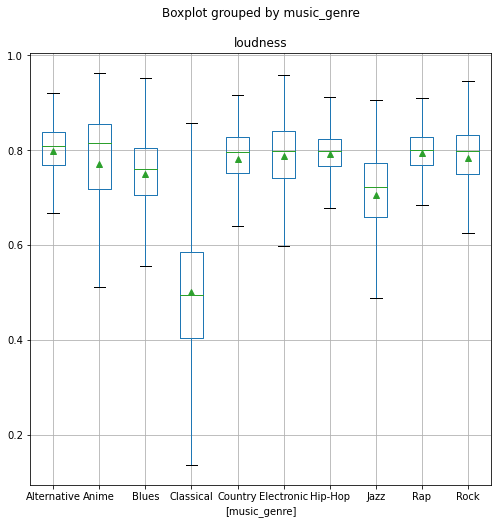

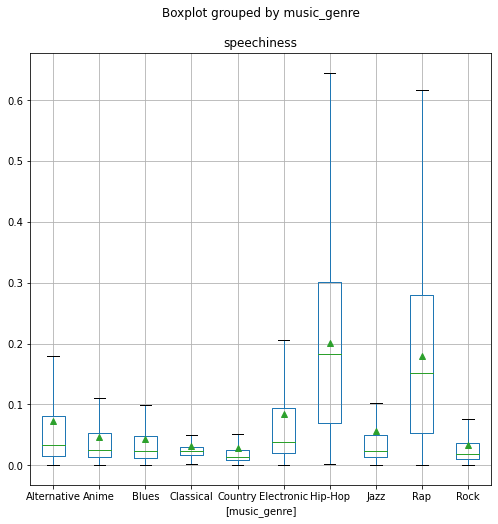

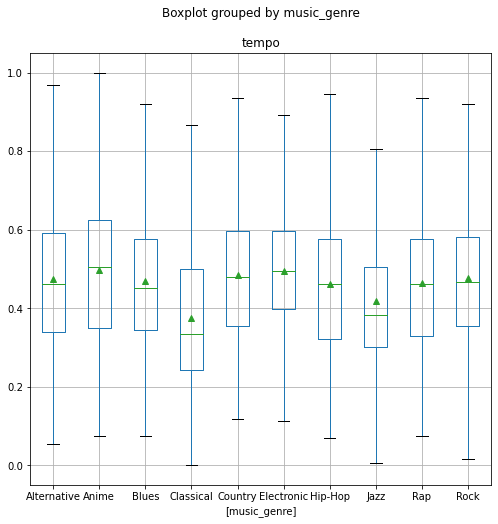

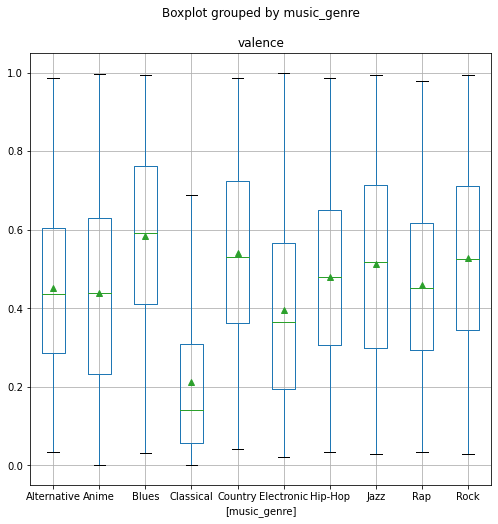

In [115]:
# Boxplots
training_features = train_df.drop(['music_genre'], axis=1)
for col in training_features:
    boxplot = df.boxplot(column=[col], by=['music_genre'], figsize=(8,8), showfliers=False, showmeans=True)

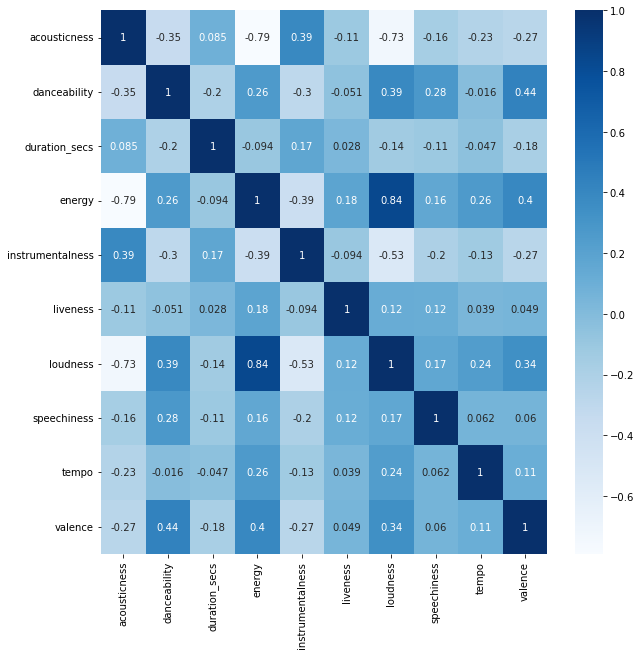

In [116]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [118]:
knn_model = KNeighborsClassifier(5)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 5:')
print(metrics.classification_report(training_labels,predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 5:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))




training set when k = 5:
              precision    recall  f1-score   support

 Alternative       0.37      0.54      0.44      3084
       Anime       0.53      0.56      0.55      3033
       Blues       0.52      0.55      0.53      2991
   Classical       0.82      0.85      0.84      3019
     Country       0.48      0.59      0.53      3023
  Electronic       0.66      0.59      0.63      3036
     Hip-Hop       0.55      0.64      0.59      3108
        Jazz       0.61      0.48      0.54      3057
         Rap       0.56      0.41      0.47      3010
        Rock       0.47      0.28      0.35      3059

    accuracy                           0.55     30420
   macro avg       0.56      0.55      0.55     30420
weighted avg       0.56      0.55      0.55     30420

[[1672  196  142   12  271  143  219   91  133  205]
 [ 402 1712  101  226  211  128   12  100   22  119]
 [ 372  177 1633   27  258   71   39  197   32  185]
 [ 107  128   42 2578   13   21    0  104    2   24]
 [ 3

In [119]:
knn_model = KNeighborsClassifier(25)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 25:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 25:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))


training set when k = 25:
              precision    recall  f1-score   support

 Alternative       0.32      0.31      0.32      3084
       Anime       0.44      0.40      0.42      3033
       Blues       0.41      0.39      0.40      2991
   Classical       0.78      0.85      0.82      3019
     Country       0.34      0.58      0.43      3023
  Electronic       0.59      0.53      0.56      3036
     Hip-Hop       0.46      0.59      0.52      3108
        Jazz       0.48      0.43      0.45      3057
         Rap       0.44      0.32      0.37      3010
        Rock       0.32      0.19      0.24      3059

    accuracy                           0.46     30420
   macro avg       0.46      0.46      0.45     30420
weighted avg       0.46      0.46      0.45     30420

[[ 968  330  190    9  541  193  278  136  189  250]
 [ 341 1219  115  365  429  182   14  200    9  159]
 [ 246  182 1165   32  560   94   56  345   35  276]
 [ 113  106   30 2570   24   31    0  131    3   11]
 [ 

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
model = GaussianNB()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
model.fit(training_features, training_labels)
predicted = model.predict(training_features)

print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

print('testing set:')
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
predicted = model.predict(testing_features)
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.24      0.08      0.12      3084
       Anime       0.31      0.09      0.14      3033
       Blues       0.34      0.12      0.18      2991
   Classical       0.65      0.86      0.74      3019
     Country       0.22      0.84      0.35      3023
  Electronic       0.48      0.32      0.38      3036
     Hip-Hop       0.42      0.34      0.37      3108
        Jazz       0.39      0.27      0.32      3057
         Rap       0.34      0.38      0.36      3010
        Rock       0.16      0.10      0.12      3059

    accuracy                           0.34     30420
   macro avg       0.35      0.34      0.31     30420
weighted avg       0.35      0.34      0.31     30420

[[ 256   62   91   39 1622  132  196  118  237  331]
 [ 270  266   68  540 1164  165    4  174   49  333]
 [  88  126  372  107 1457  135   54  258   59  335]
 [  37   35   23 2595   78   60    0  142    3   46]
 [  21   16   8

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [141]:
ada = AdaBoostClassifier()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
ada.fit(training_features, training_labels)

predicted = ada.predict(training_features)
print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = ada.predict(testing_features)
print('testing set:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.28      0.13      0.18      3084
       Anime       0.38      0.33      0.35      3033
       Blues       0.37      0.26      0.30      2991
   Classical       0.52      0.91      0.67      3019
     Country       0.35      0.60      0.44      3023
  Electronic       0.46      0.41      0.44      3036
     Hip-Hop       0.38      0.73      0.50      3108
        Jazz       0.39      0.31      0.35      3057
         Rap       0.26      0.11      0.16      3010
        Rock       0.25      0.12      0.16      3059

    accuracy                           0.39     30420
   macro avg       0.37      0.39      0.35     30420
weighted avg       0.36      0.39      0.35     30420

[[ 415  380  164  193  548  300  497  162  143  282]
 [ 184 1005  109  763  393  177   37  112  108  145]
 [ 127  207  767  258  631  189  161  419   27  205]
 [  48   56   35 2751   20   25    2   58    8   16]
 [  89  158  18